###  Read -->

https://chaitanyak.me/blog/data-science/build-k-nn-from-scratch-in-python/

https://mmuratarat.github.io/2019-07-12/k-nn-from-scratch

https://towardsdatascience.com/cross-validation-using-knn-6babb6e619c8

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random
from sklearn.metrics import accuracy_score


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_test, y_test



### only X_train and y_train important

In [2]:
# print((X_train.shape), (X_test.shape), (y_train.shape), (y_test.shape))

print((X_train.shape),(y_train.shape))

(7500, 2) (7500,)


In [3]:
X_train.shape

(7500, 2)

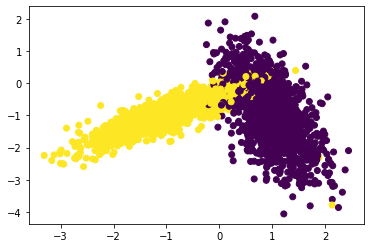

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

### Step 1 

Generate 10 unique value in range of "param_range"

In [5]:
param_range = 50

param_ls = sorted(random.sample(range(1, param_range), 10))
param_ls # these are the hypyerparameter K in K-NN

[8, 11, 14, 15, 27, 28, 37, 46, 47, 49]

### Step 2

Divide the training data into k' fold number of times

In [6]:
folds = 3 # this is like k in k-fold CV

size_per_fold = X_train.shape[0]//folds

train_1 = X_train[:size_per_fold]
train_2 = X_train[size_per_fold:(size_per_fold*2)]
train_3 = X_train[-size_per_fold:]
print(train_1.shape,train_2.shape,train_3.shape)

(2500, 2) (2500, 2) (2500, 2)


In [7]:
(np.vstack((train_1,train_2))).shape

(5000, 2)

In [8]:
total_x_train = list([train_1, train_2, train_3])
len(total_x_train)

3

In [9]:
test_1 = y_train[:size_per_fold]
test_2 = y_train[size_per_fold:(size_per_fold*2)]
test_3 = y_train[-size_per_fold:]
print(test_1.shape,test_2.shape,test_3.shape)

(2500,) (2500,) (2500,)


In [10]:
(np.hstack((test_1, test_2))).shape

(5000,)

In [11]:
total_y_train = list([test_1, test_2, test_3])

In [12]:
len(total_y_train)

3

### Step 3 do k-fold CV 

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [14]:
check_knn = KNeighborsClassifier()
check_knn.n_neighbors =100
check_knn

KNeighborsClassifier(n_neighbors=100)

In [15]:
'''
        dry run
        ------train data-----
        count   = 2        1       0
                = g3      g2      g1

        count-1 = 1        0      -1
                = g2      g1      g3
                
    train_d_cv = (g3+g3) (g0+g1) (g1+g3)
        --------test data------
        count-2 = 0       -1      -2
        
      test_d_cv = (g1)    (g3)    (g2)
'''
train_score = []
test_score = []

for nn in param_ls:

    
    count = 2
    for k in range(folds):
        # print(k)
        train_fold = []
        test_fold = []
        
        train_x = np.vstack((total_x_train[count], total_x_train[count-1]))
        train_x_cv = total_x_train[count-2]
        train_y = np.hstack((total_y_train[count], total_y_train[count-1]))
        train_y_cv = total_y_train[count-2]
        
        

        count-=1
    # print(knn)

#     print(train_x.shape, train_y.shape)
#     print(train_y_cv.shape, train_x_cv.shape)
        
        
        
        
#         ###### CLASSIFICATION
        knn.n_neighbors = nn
        knn.fit(train_x, train_y)
        
        
        ### Train Data accuracy
        y_pred_train = knn.predict(train_x)
    # print(y_pred.shape)
    # print(train_y.shape)
        train_fold.append(accuracy_score(train_y,y_pred_train))
        
        ### Test Data sccuracy
        y_pred = knn.predict(train_x_cv)    #!!!
    # print(y_pred.shape)
        test_fold.append(accuracy_score(train_y_cv, y_pred))

        
    train_score.append(np.mean(np.array(train_fold)))
    test_score.append(np.mean(np.array(test_fold)))
    

print(train_score)
print(test_score)
print(param_ls)
        
        

[0.9592, 0.9592, 0.9584, 0.9586, 0.9572, 0.9578, 0.9582, 0.958, 0.9584, 0.9584]
[0.9588, 0.9564, 0.9568, 0.9552, 0.9544, 0.9544, 0.9552, 0.9552, 0.9552, 0.9548]
[8, 11, 14, 15, 27, 28, 37, 46, 47, 49]


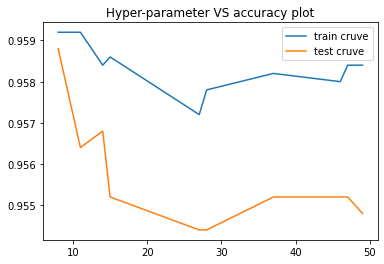

In [16]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.plot(param_ls,train_score, label='train cruve')
plt.plot(param_ls,test_score, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()